In [2]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt

# Análisis exploratorio y curación de datos

## Ejercicio: tablas de crecimiento

1. Descargar dataset #1 y #2 en CSV https://www.cdc.gov/growthcharts/percentile_data_files.htm 
2. Graficar las curvas correspondientes a cada percentil para niños y niñas

## Peso (wtageinf.csv)

In [3]:
# Weight-for-age charts, birth to 36 months, LMS parameters and selected smoothed weight percentiles in kilograms, by sex and age

datasetP = pd.read_csv('wtageinf.csv')
datasetP[:3]

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929


In [34]:
# Hombres
datasetP_hombres = datasetP[datasetP["Sex"]==1]
datasetP_hombres[:3]

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


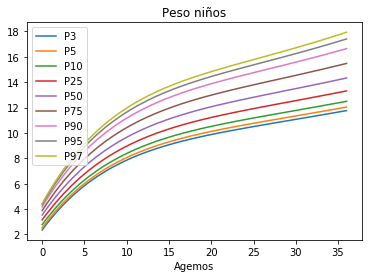

In [31]:
datasetP_hombres.plot(x="Agemos", y=["P3", "P5", "P10","P25", "P50", "P75","P90", "P95", "P97"], kind="line", title="Peso niños")

In [48]:
# Mujeres
datasetP_mujeres = datasetP[datasetP["Sex"]==2]
datasetP_mujeres[:3]

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
38,2,0.0,1.509188,3.399186,0.142107,2.414112,2.547905,2.747222,3.064865,3.399186,3.717519,3.992572,4.152637,4.254922
39,2,0.5,1.357944,3.797528,0.138076,2.756917,2.894442,3.101767,3.437628,3.797528,4.145594,4.450126,4.628836,4.743582
40,2,1.5,1.105538,4.544777,0.131734,3.402293,3.547610,3.770157,4.138994,4.544777,4.946766,5.305632,5.519169,5.657379


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


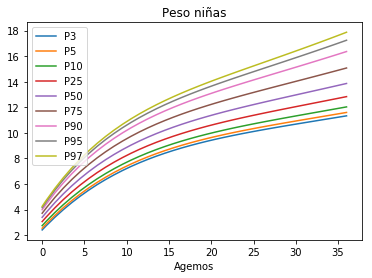

In [33]:
datasetP_mujeres.plot(x="Agemos", y=["P3", "P5", "P10","P25", "P50", "P75","P90", "P95", "P97"], kind="line", title="Peso niñas")

## Altura (lenageinf.csv)

In [43]:
# Length-for-age charts, birth to 36 months, LMS parameters and selected smoothed recumbent length percentiles in centimeters, by sex and age

datasetA = pd.read_csv('lenageinf.csv')

# Luego de avanzar encontramos un error para gráficar ya que el dataset arma las columnas como string, pasamos todo
# a valores numéricos
datasetA = datasetA.convert_objects(convert_numeric=True)

datasetA[:3]



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,...,Pub97,Diff3,Diff5,Diff10,Diff25,Diff50,Diff75,Diff90,Diff95,Diff97
0,1.0,0.0,1.267004,49.988884,0.053112,44.925098,45.568409,46.554293,48.189374,49.988884,...,54.840115,-0.081028,-0.070742,-0.054964,-0.028800,0.0,0.028526,0.053972,0.069107,0.078889
1,1.0,0.5,0.511238,52.695975,0.048693,47.978124,48.558092,49.457804,50.979189,52.695975,...,57.554951,-0.071614,-0.062817,-0.049158,-0.026065,0.0,0.026487,0.050681,0.065326,0.074892
2,1.0,1.5,-0.452244,56.628429,0.044117,52.198595,52.726107,53.553647,54.979104,56.628429,...,61.555326,-0.062572,-0.055127,-0.043436,-0.023302,0.0,0.024331,0.047154,0.061257,0.070589


In [46]:
# Hombres
datasetA_hombres = datasetA[datasetA["Sex"]==1.0]
datasetA_hombres[:3]

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,...,Pub97,Diff3,Diff5,Diff10,Diff25,Diff50,Diff75,Diff90,Diff95,Diff97
0,1.0,0.0,1.267004,49.988884,0.053112,44.925098,45.568409,46.554293,48.189374,49.988884,...,54.840115,-0.081028,-0.070742,-0.054964,-0.028800,0.0,0.028526,0.053972,0.069107,0.078889
1,1.0,0.5,0.511238,52.695975,0.048693,47.978124,48.558092,49.457804,50.979189,52.695975,...,57.554951,-0.071614,-0.062817,-0.049158,-0.026065,0.0,0.026487,0.050681,0.065326,0.074892
2,1.0,1.5,-0.452244,56.628429,0.044117,52.198595,52.726107,53.553647,54.979104,56.628429,...,61.555326,-0.062572,-0.055127,-0.043436,-0.023302,0.0,0.024331,0.047154,0.061257,0.070589


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


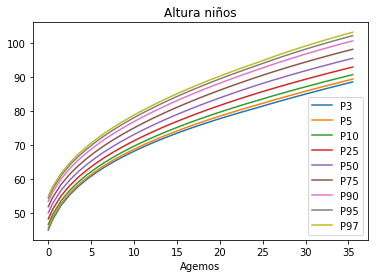

In [47]:
datasetA_hombres.plot(x="Agemos", y=["P3", "P5", "P10","P25", "P50", "P75","P90", "P95", "P97"], kind="line", title="Altura niños")

In [49]:
# Mujeres
datasetA_mujeres = datasetA[datasetA["Sex"]==2.0]
datasetA_mujeres[:3]

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,...,Pub97,Diff3,Diff5,Diff10,Diff25,Diff50,Diff75,Diff90,Diff95,Diff97
38,2.0,0.0,-1.295961,49.286396,0.050086,45.094883,45.575607,46.339337,47.683455,49.286396,...,54.410737,-0.068027,-0.060231,-0.047834,-0.026020,0.0,0.028120,0.055447,0.072822,0.084536
39,2.0,0.5,-0.809250,51.683581,0.046819,47.469158,47.963240,48.742482,50.096855,51.683581,...,56.550769,-0.065226,-0.057585,-0.045523,-0.024562,0.0,0.026007,0.050747,0.066207,0.076511
40,2.0,1.5,-0.050783,55.286128,0.043444,50.957006,51.479957,52.296269,53.690781,55.286128,...,59.935129,-0.062634,-0.055075,-0.043262,-0.023086,0.0,0.023808,0.045868,0.059369,0.068249


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


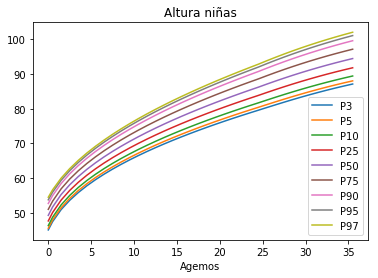

In [50]:
datasetA_mujeres.plot(x="Agemos", y=["P3", "P5", "P10","P25", "P50", "P75","P90", "P95", "P97"], kind="line", title="Altura niñas")